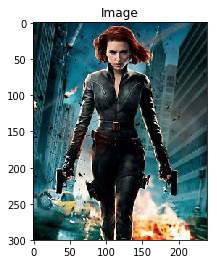

In [1]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/scarlett.jpg', cv.IMREAD_COLOR)

cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.imshow('Image', img)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Image')
plt.show() 

cv.waitKey(0)
cv.destroyAllWindows()

In [2]:
print("hello")

hello


232
432
255


Text(0.5,1,'cv.add')

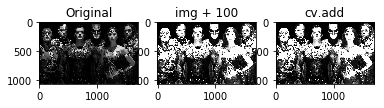

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/justice.jpg', cv.IMREAD_GRAYSCALE)

brightness = 100
# just adding
imgb = img + brightness

# adding pixel by pixel
h = img.shape[0]
w = img.shape[1]
for i in range(0, h):
    for j in range(0, w):
        imgb[i, j] = min(img[i, j] + brightness, 255)

imgc = cv.add(img, brightness)

f, axarr = plt.subplots(1, 3)

index1 = 500
index2 = 700

print(img[index1, index2])
print(img[index1, index2] + brightness)
print(imgc[index1, index2])

axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')

axarr[1].imshow(imgb, cmap="gray")
axarr[1].set_title('img + 100')

axarr[2].imshow(imgc, cmap="gray")
axarr[2].set_title('cv.add')


In [1]:
# Intensity inverse transform
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

transform = np.arange(255, -1, -1).astype('uint8')
plt.plot(transform)
plt.xlabel('Input, $f(x)$')
plt.ylabel('Output, $T[f(x)]$')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()

img_original = cv.imread('images/bluefish.jpg', cv.IMREAD_GRAYSCALE)
img_transformed = cv.LUT(img_original, transform)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_original)
cv.waitKey(0)

cv.namedWindow('Image Transformed', cv.WINDOW_AUTOSIZE)
cv.imshow('Image Transformed', img_transformed)
cv.waitKey(0)

cv.destroyAllWindows()

<Figure size 640x480 with 1 Axes>

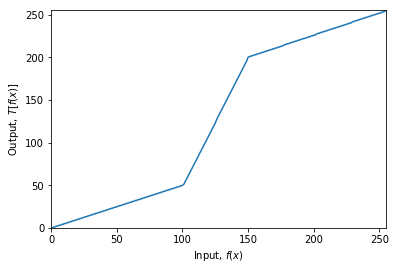

In [2]:
# Intensity inverse transform
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[0, 1]+1, c[1, 1], c[1, 0]-c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1]+1, 255, 255-c[1, 0]).astype('uint8')

transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
plt.plot(transform)
plt.xlabel('Input, $f(x)$')
plt.ylabel('Output, $T[f(x)]$')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.show()

img_original = cv.imread('images/bluefish.jpg', cv.IMREAD_GRAYSCALE)
img_transformed = cv.LUT(img_original, transform)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_original)
cv.waitKey(0)

cv.namedWindow('Image Transformed', cv.WINDOW_AUTOSIZE)
cv.imshow('Image Transformed', img_transformed)
cv.waitKey(0)

cv.destroyAllWindows()

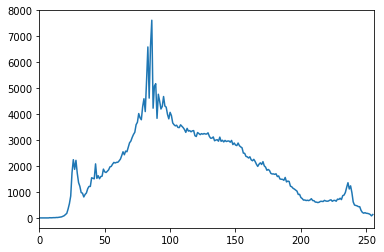

In [2]:
# Calculate the histogram
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/bluefish.jpg', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [3]:
# Histogram equalization
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/scarlett.jpg', cv.IMREAD_GRAYSCALE)
equ = cv.equalizeHist(img)

cv.namedWindow('Original', cv.WINDOW_AUTOSIZE)
cv.imshow('Original', img)
cv.waitKey(0)
cv.namedWindow('Equalized', cv.WINDOW_AUTOSIZE)
cv.imshow('Equalized', equ)
cv.waitKey(0)

histOriginal = cv.calcHist([img], [0], None, [256], [0, 256])
histEqualized = cv.calcHist([equ], [0], None, [256], [0, 256])

plt.plot(histOriginal)
plt.xlim([0, 256])
plt.show()

plt.plot(histEqualized)
plt.xlim([0, 256])
plt.show()

cv.destroyAllWindows()

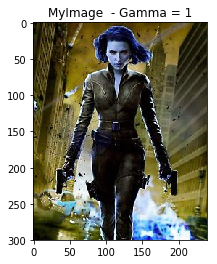

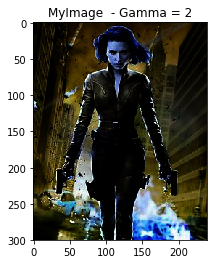

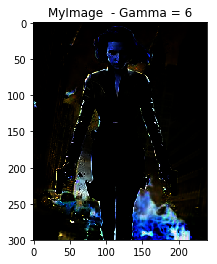

/home/kavindu/anaconda3/envs/opencv1/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


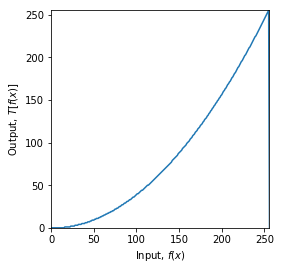

In [7]:
# Gamma function
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('images/scarlett.jpg', cv.IMREAD_COLOR)
plt.imshow(img)
plt.title('MyImage  - Gamma = 1')
plt.show()

gamma = 2
transform2 = np.array([(i/255.0)**gamma*255.0 for i in np.arange(0, 256)])\
    .astype('uint8')
img_gamma = cv.LUT(img, transform2)
plt.imshow(img_gamma)
plt.title('MyImage  - Gamma = 2')
plt.show()

gamma = 6
transform6 = np.array([(i/255.0)**gamma*255.0 for i in np.arange(0, 256)])\
    .astype('uint8')
img_gamma = cv.LUT(img, transform6)
plt.imshow(img_gamma)
plt.title('MyImage  - Gamma = 6')
plt.show()

transform = np.concatenate((transform2, transform6), axis=0).astype('uint8')
plt.plot(transform)
plt.xlabel('Input, $f(x)$')
plt.ylabel('Output, $T[f(x)]$')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.axes().set_aspect('equal')
plt.savefig('15. Transform.png')
plt.show()

300 240
1 1


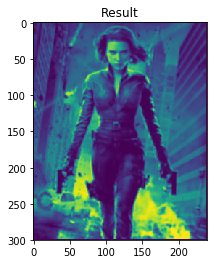

In [3]:
# Spatial Filtering Using Loops
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math


def filter_image(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh = math.floor(kernel.shape[0] / 2)
    k_hw = math.floor(kernel.shape[1] / 2)

    h, w = image.shape
    print(h, w)
    print(k_hh, k_hw)
    result = np.zeros(image.shape, 'float')
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)

    for i in range(int(k_hh), h-k_hh):
        for j in range(int(k_hw), w-k_hw):
            result[i, j] = int(np.dot(image_float[i - k_hh: i + k_hh + 1, j - k_hw: j + k_hw + 1].flatten(),
                                  kernel.flatten())*255)
    return result


img = cv.imread('images/scarlett.jpg', cv.IMREAD_GRAYSCALE)
img_result = filter_image(img, np.array([(1, 1, 1), (1, 1, 1), (1, 1, 1)])*(1/9))
plt.imshow(img_result)
plt.title('Result')
plt.show()


In [8]:
import cv2 as cv

kernel = np.ones((5, 5), np.float32)/25
img = cv.imread('images/scarlett.jpg', cv.IMREAD_GRAYSCALE)

imf = cv.filter2D(img, -1, kernel)



In [1]:
# Sharpening ... have to check and investigate
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/blured.jpeg', cv.IMREAD_GRAYSCALE)

blured = cv.GaussianBlur(img, (5, 5), 2)
hp = cv.subtract(img, blured)
alpha = 1
result = cv.add(img, alpha*hp)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img)
cv.waitKey(0)

cv.namedWindow('ImageSharpen', cv.WINDOW_AUTOSIZE)
cv.imshow('ImageSharpen', result)
cv.waitKey(0)

cv.destroyAllWindows()

In [4]:
# Create Gaussian kernel
import numpy as np
import math

sigma = 2
hw = 3*sigma
w = hw*2 + 1
g = np.zeros((w, w))

for i in range(-hw, hw+1):
    for j in range(-hw, hw+1):
        print(i, j)
        g[i + hw, j + hw] = 1/(2*math.pi*sigma ** 2)*math.exp(-(i ** 2 + j ** 2)/(2*sigma ** 2))
        
print(g)

-2 -2
-2 -1
-2 0
-2 1
-2 2
-1 -2
-1 -1
-1 0
-1 1
-1 2
0 -2
0 -1
0 0
0 1
0 2
1 -2
1 -1
1 0
1 1
1 2
2 -2
2 -1
2 0
2 1
2 2
[[0.01463746 0.02129738 0.02413309 0.02129738 0.01463746]
 [0.02129738 0.0309875  0.03511344 0.0309875  0.02129738]
 [0.02413309 0.03511344 0.03978874 0.03511344 0.02413309]
 [0.02129738 0.0309875  0.03511344 0.0309875  0.02129738]
 [0.01463746 0.02129738 0.02413309 0.02129738 0.01463746]]


In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/scarlett.jpg', cv.IMREAD_COLOR)

sigma = 5
kernel = cv.getGaussianKernel(11, sigma)
blue, green, red = cv.split(img)
# print(blue)

filterb = cv.GaussianBlur(blue[0], (11, 11), 0)
filterg = cv.GaussianBlur(blue[0], (11, 11), 0)
filterr = cv.GaussianBlur(blue[0], (11, 11), 0)

result = cv.merge((filterb, filterg, filterr))
cv.namedWindow('ImageSharpen', cv.WINDOW_AUTOSIZE)
cv.imshow('ImageSharpen', result)
cv.waitKey(0)

In [ ]:
import numpy as np

hx = np.array([1, -1])
np.transpose(hx, axes='x')
print(hx)

hy = np.array([1, -1])
print(hy)


